# Visualize CNA results together

In [2]:
require(gdata)
library(readxl)
library(dplyr)
library(patchwork)
library(uwot)
library(harmony)
library(magrittr)
library(gridExtra)
library(reticulate)
library(ggbeeswarm)
library(ggrepel)
library(plyr)
library(ggplot2)
library(gridExtra)
library(RColorBrewer)
library(MASS)
library(matrixStats)
library(viridis)
library(grid)
library(singlecellmethods)
library(stringr)
library(data.table)
library(ggridges)
library("readxl")
library(ggbeeswarm)
library(ggpubr)
library(pheatmap)
library(ggrastr)

'%!in%' <- function(x,y)!('%in%'(x,y))

# T cell

New names:
• `` -> `...1`


[1] 67383   134

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


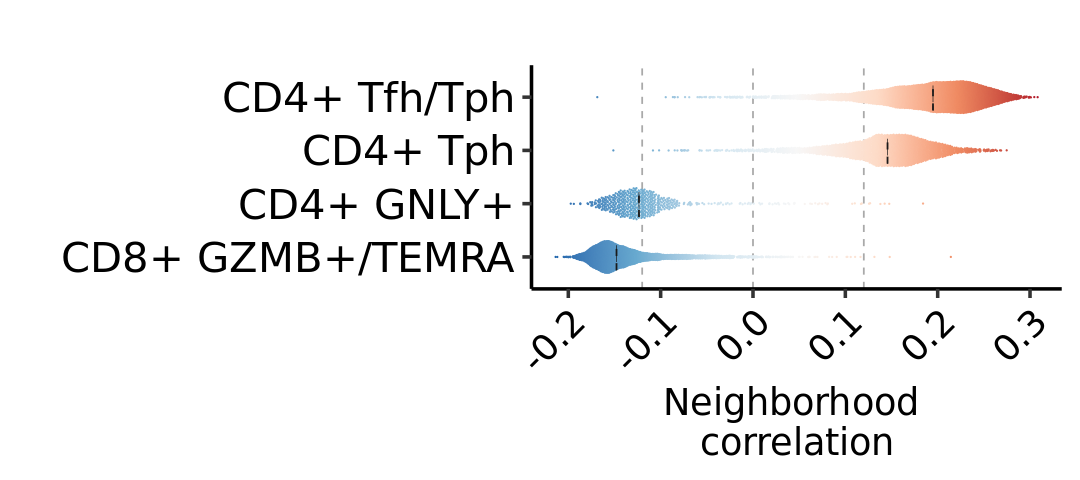

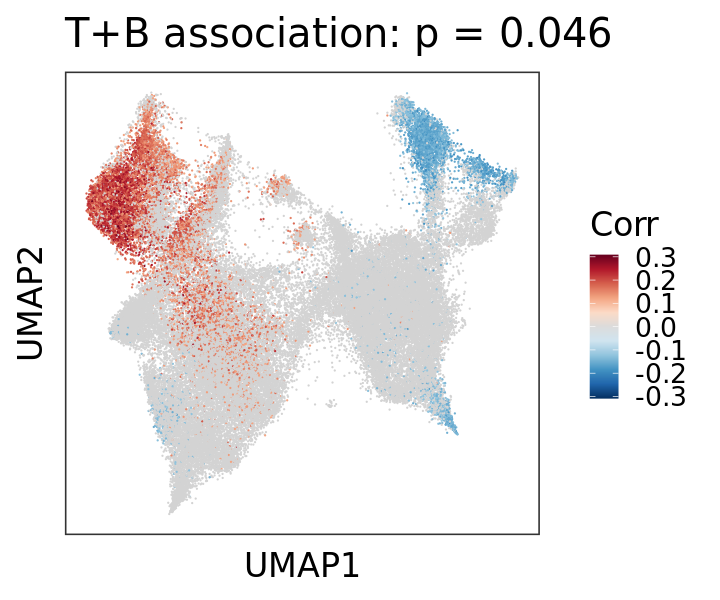

In [20]:
cna_res <- read_excel("tcell_TB_res.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
ref <- readRDS("../../data/amp_phase2_ra/T_reference_2020-11-25.rds")
cna_res <- merge(cna_res, ref$meta_data[, c("cell", "cluster_number", "cluster_name")])
dim(cna_res)


fdr_thresh <- 0.12
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("TB", nrow(test))
test$cell_type <- "T cell"
test$permutation_p <- 0.046

options(repr.plot.height = 4, repr.plot.width = 9)
ggplot(cna_res[which(cna_res$cluster_name %in% c( "CD4+ GNLY+", "CD8+ GZMB+/TEMRA", "CD4+ Tfh/Tph", "CD4+ Tph")),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
  scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood \ncorrelation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))



interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "T+B association: p = 0.046")


New names:
• `` -> `...1`


[1] 67383    22

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


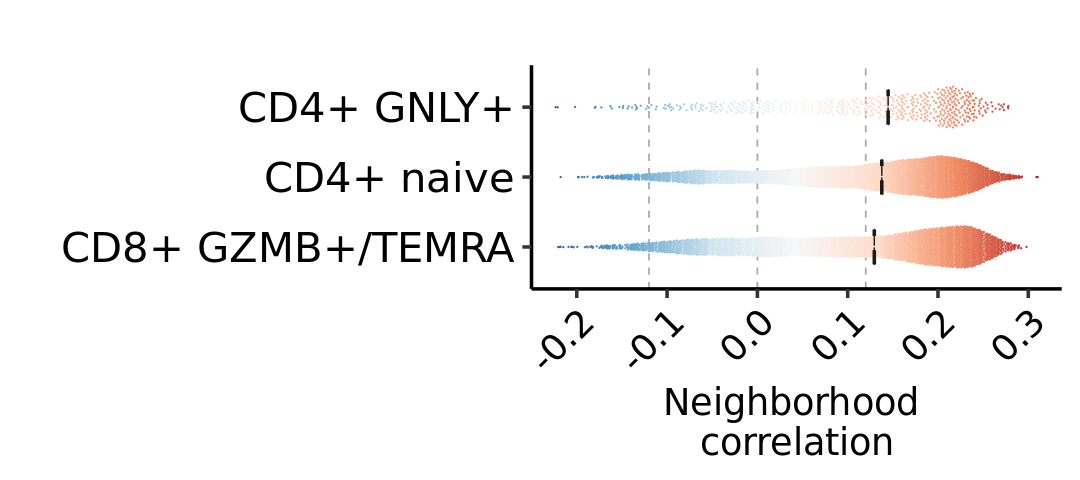

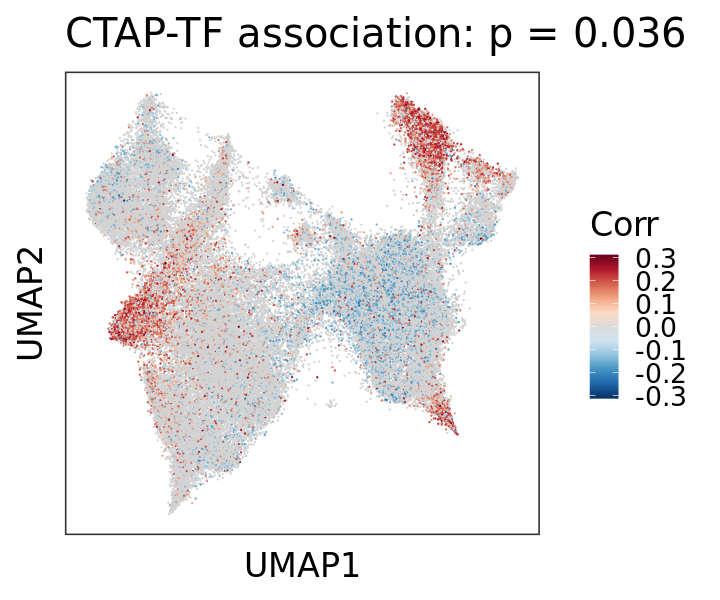

In [19]:
cna_res <- read_excel("tcell_TF_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
ref <- readRDS("../../data/amp_phase2_ra/T_reference_2020-11-25.rds")
cna_res <- merge(cna_res, ref$meta_data[, c("cell", "cluster_number", "cluster_name")])
dim(cna_res)


fdr_thresh <- 0.12
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("TF", nrow(test))
test$cell_type <- "T cell"
test$permutation_p <- 0.036


options(repr.plot.height = 4, repr.plot.width = 9)
 ggplot(cna_res[which(cna_res$cluster_name %in% c( "CD4+ naive", "CD4+ GNLY+", "CD8+ GZMB+/TEMRA")),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.4, linetype = "dashed") +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
  scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood \ncorrelation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))
      
               
               
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "CTAP-TF association: p = 0.036")


# B cell

New names:
• `` -> `...1`


[1] 21782    35

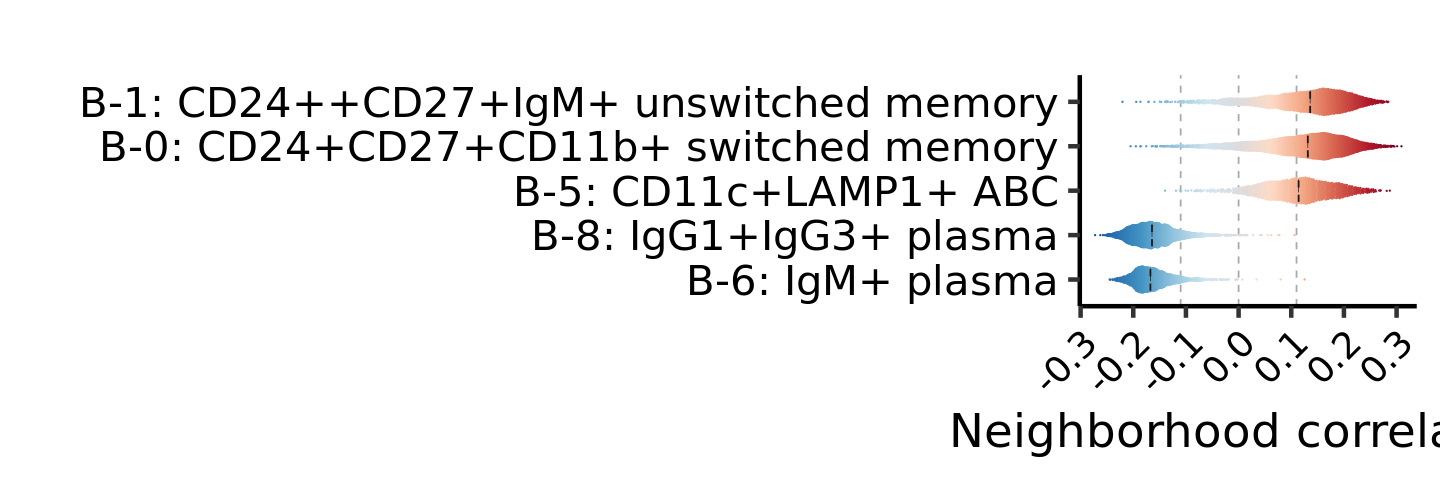

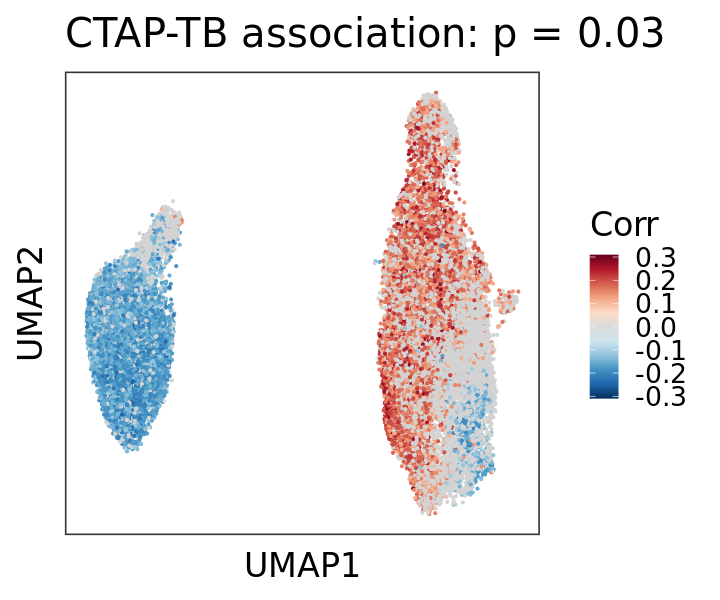

In [25]:
cna_res <- read_excel("bcell_TB_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
cna_res <- cna_res[, -which(colnames(cna_res) %in% c("cluster_name", "cluster_number"))]
ref <- readRDS("../../data/amp_phase2_ra/Bcell_reference_2021-11-30.rds")
cna_res <- merge(cna_res, ref$meta_data[, c("cell", "cluster_number", "cluster_name")])
dim(cna_res)


fdr_thresh <- 0.11
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("TB", nrow(test))
test$cell_type <- "B cell/plasma cell"
test$permutation_p <- 0.03


options(repr.plot.height = 4, repr.plot.width = 12)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_continuous(guide = FALSE) +
#   scale_x_discrete(labels = c("B-3:\nCD4+GNLY+", "T-15\nCD8+GZMB+", "T-7\nTph", "T-3\nTfh/Tph"))+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 28) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))




interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "CTAP-TB association: p = 0.03")

# M

New names:
• `` -> `...1`


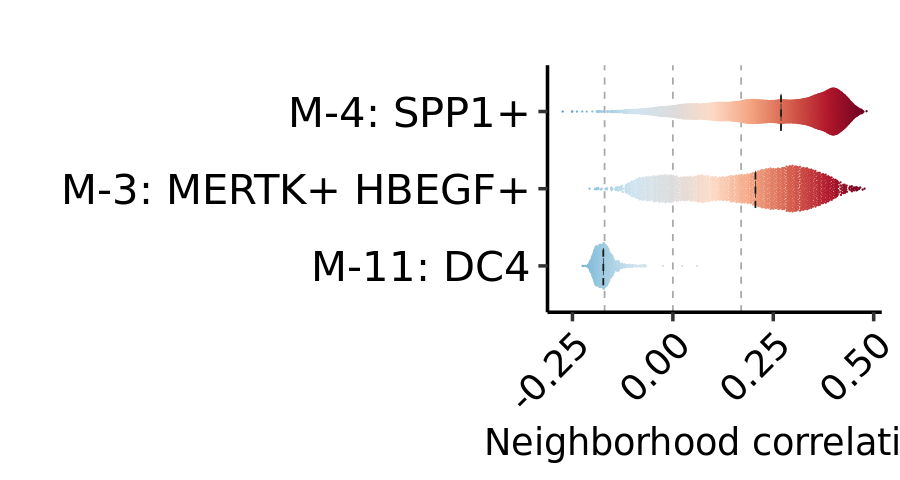

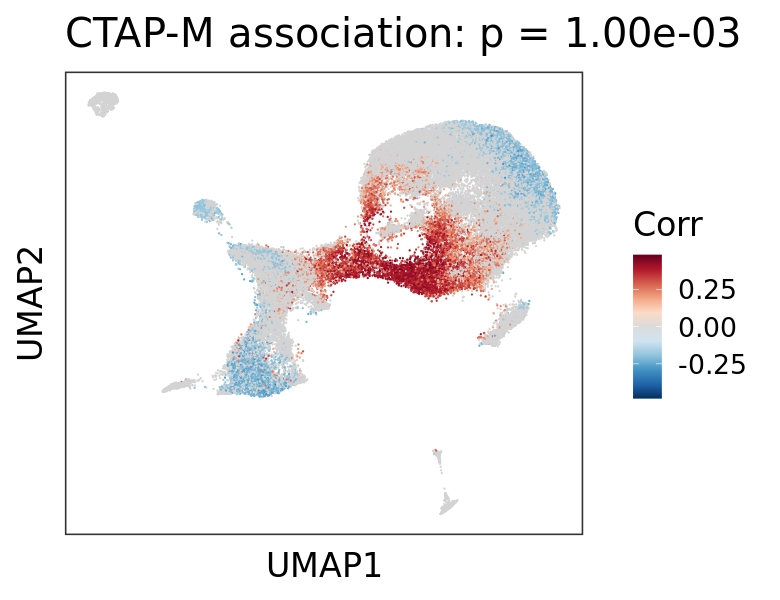

In [32]:
cna_res <- read_excel("myeloid_M_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]


fdr_thresh <- 0.17
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("M", nrow(test))
test$cell_type <- "Myeloid"
test$permutation_p <- 0.001


options(repr.plot.height = 4, repr.plot.width = 7.5)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))


interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6.5)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "CTAP-M association: p = 1.00e-03")


New names:
• `` -> `...1`


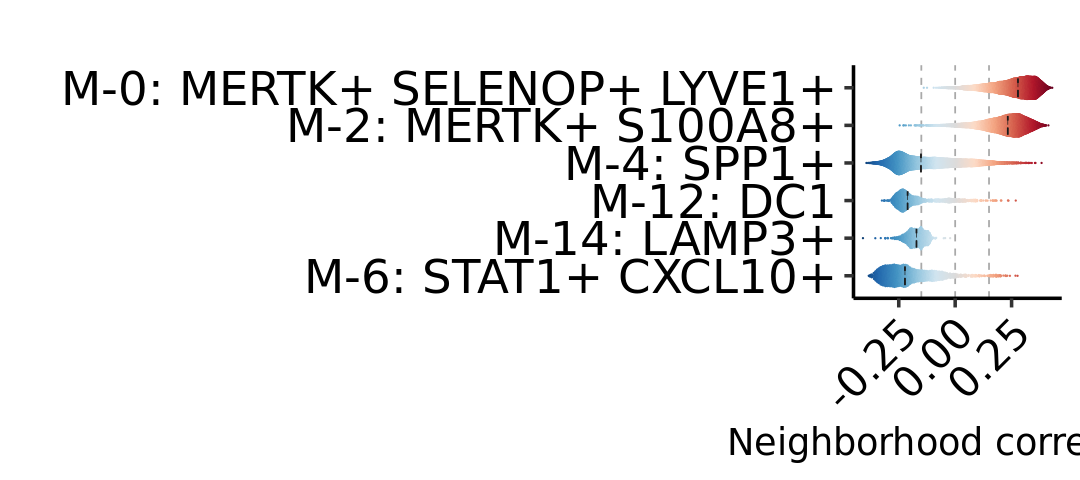

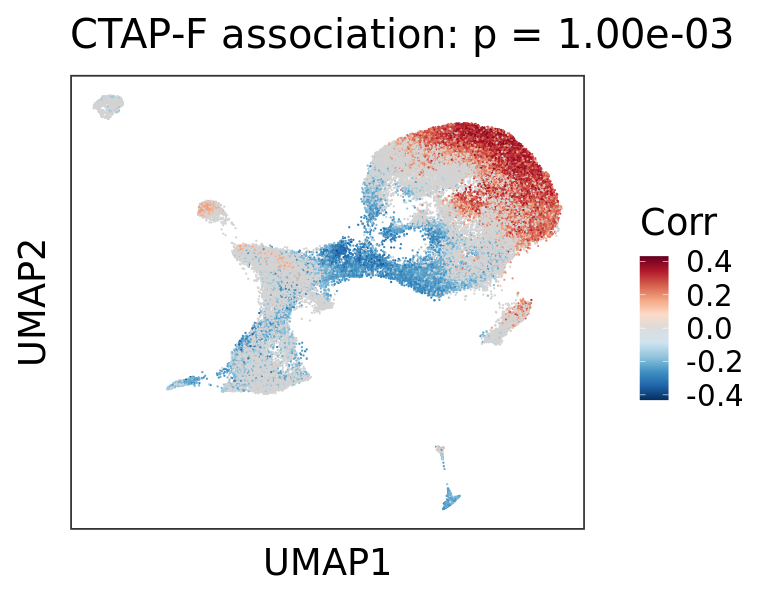

In [37]:
cna_res <- read_excel("myeloid_F_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]


fdr_thresh <- 0.15
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("F", nrow(test))
test$cell_type <- "Myeloid"
test$permutation_p <- 0.001


options(repr.plot.height = 4, repr.plot.width = 9)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 25),
       axis.text.y = element_text(color = "black", size = 28))


interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6.5)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 22)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "CTAP-F association: p = 1.00e-03")


New names:
• `` -> `...1`


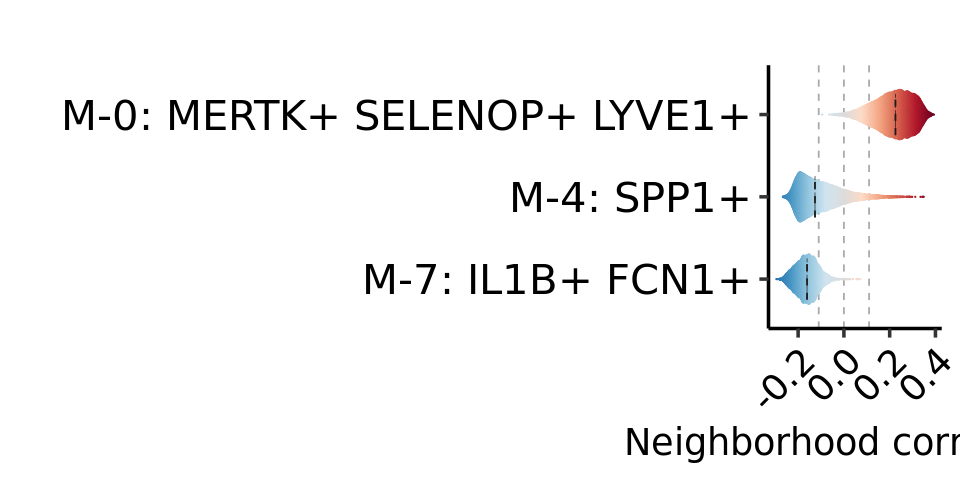

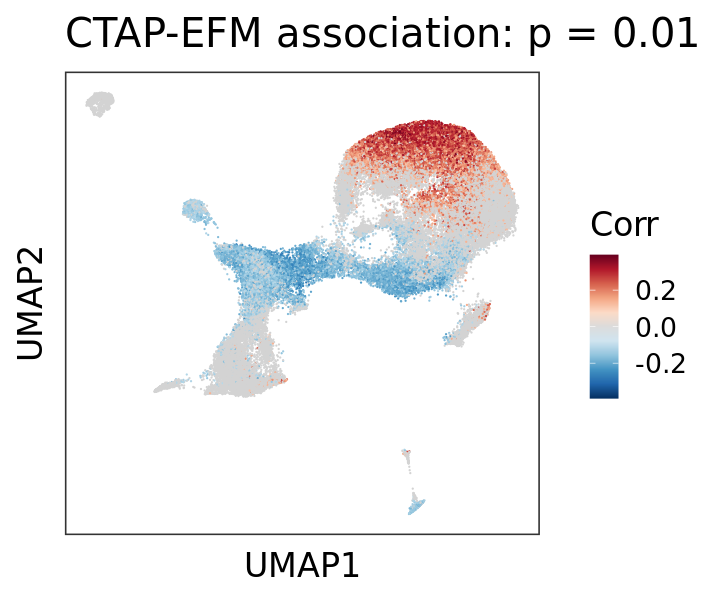

In [40]:
cna_res <- read_excel("myeloid_EFM_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]


fdr_thresh <- 0.11
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("EFM", nrow(test))
test$cell_type <- "Myeloid"
test$permutation_p <- 0.01


options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$cluster_name %in% c( "M-4: SPP1+", "M-7: IL1B+ FCN1+", "M-0: MERTK+ SELENOP+ LYVE1+")),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))


interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "CTAP-EFM association: p = 0.01")


# Endothelial cell

New names:
• `` -> `...1`
• `...1` -> `...3`


[1] 18660     6

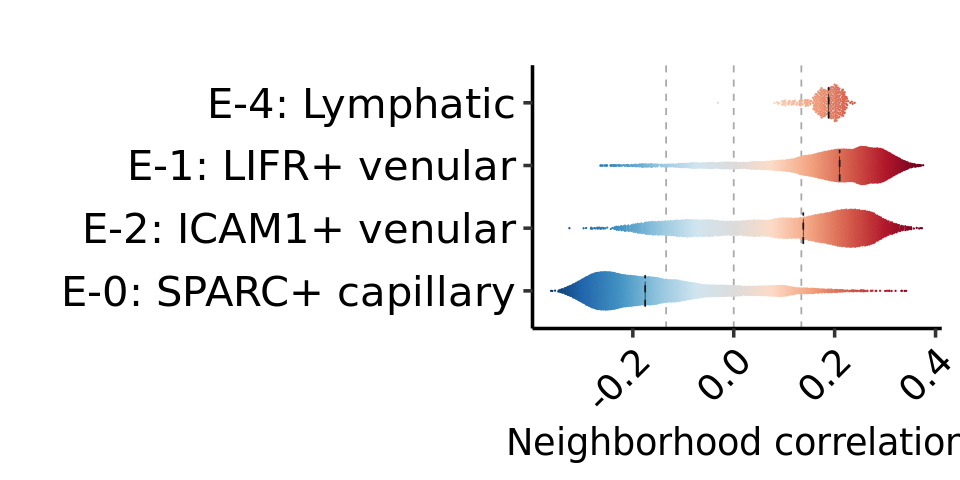

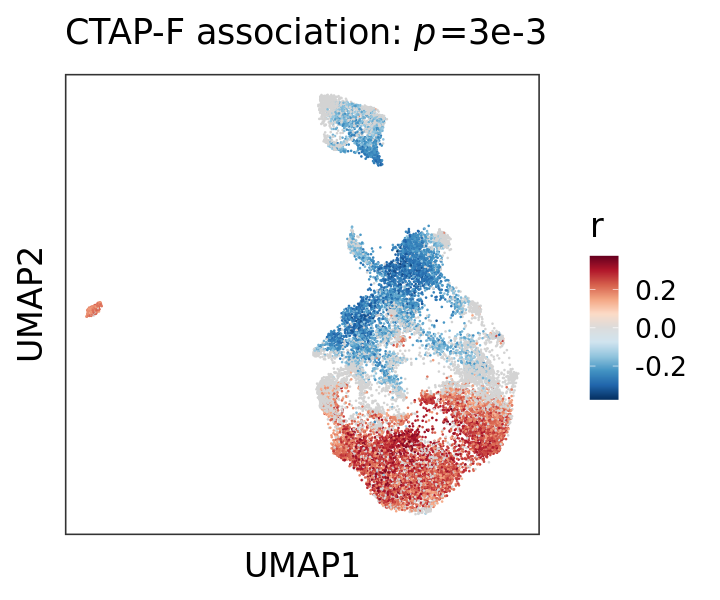

In [148]:
cna_res <- read_excel("endo_F_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
colnames(cna_res)[which(colnames(cna_res) == "CellID")] <- "cell"
ref <- readRDS("../../data/amp_phase2_ra/endothelial_reference_2021-04-29.rds")
temp <- cbind(ref$meta_data[, c("cell", "cluster_number", "cluster_name")], ref$umap$embedding)
cna_res <- merge(cna_res[, c("cell", "res_ncorrs")], temp, by ="cell")
dim(cna_res)

fdr_thresh <- 0.134
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("F", nrow(test))
test$cell_type <- "Endothelial cell"
test$permutation_p <- 0.003


options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),],  
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))

interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.1) + 
      scale_colour_gradientn( na.value="lightgray",colors = myPalette(100), limits = interval, name = "r") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=21), # face="bold.italic"
        ) +
        ggtitle(expression(paste("CTAP-F association:", italic(" p"), "=3e-3")))

ggsave(file = paste("cna_endothelial_F", ".png", sep = ""), width = 5, height = 4, dpi = 300)

New names:
• `` -> `...1`
• `...1` -> `...3`


[1] 18660     6

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


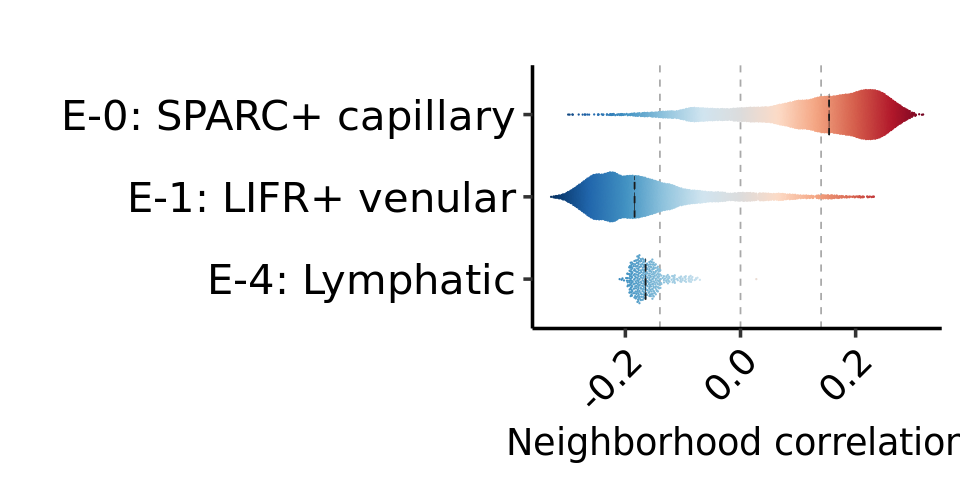

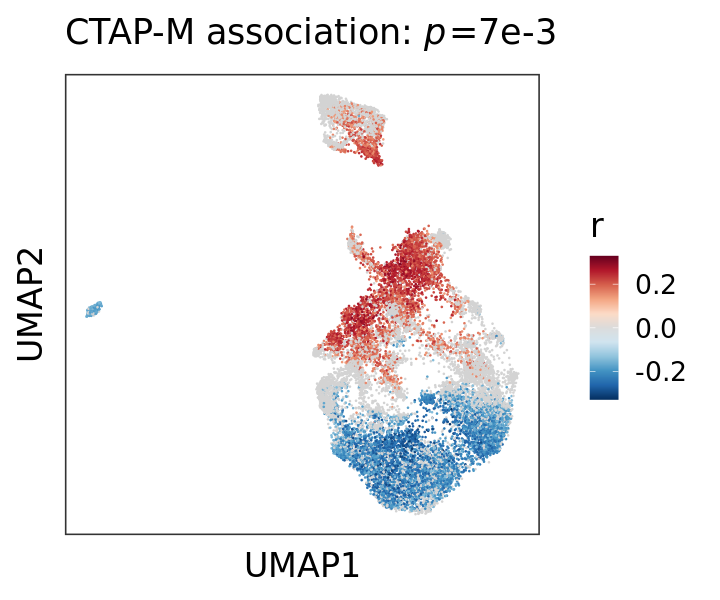

In [61]:
cna_res <- read_excel("endo_M_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
colnames(cna_res)[which(colnames(cna_res) == "CellID")] <- "cell"
ref <- readRDS("../../data/amp_phase2_ra/endothelial_reference_2021-04-29.rds")
temp <- cbind(ref$meta_data[, c("cell", "cluster_number", "cluster_name")], ref$umap$embedding)
cna_res <- merge(cna_res[, c("cell", "res_ncorrs")], temp, by ="cell")
dim(cna_res)

fdr_thresh <- 0.14
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 *sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("M", nrow(test))
test$cell_type <- "Endothelial cell"
test$permutation_p <- 0.007


options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),],  
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))

interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.1) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "r") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=21), # face="bold.italic"
        ) +
#       labs(title = "CTAP-M association:\np = 7e-3")
        ggtitle(expression(paste("CTAP-M association:", italic(" p"), "=7e-3")))
ggsave(file = paste("cna_endothelial_M", ".png", sep = ""), width = 5, height = 4, dpi = 300)

# Stromal

New names:
• `` -> `...1`
• `...1` -> `...3`


[1] 61358     6

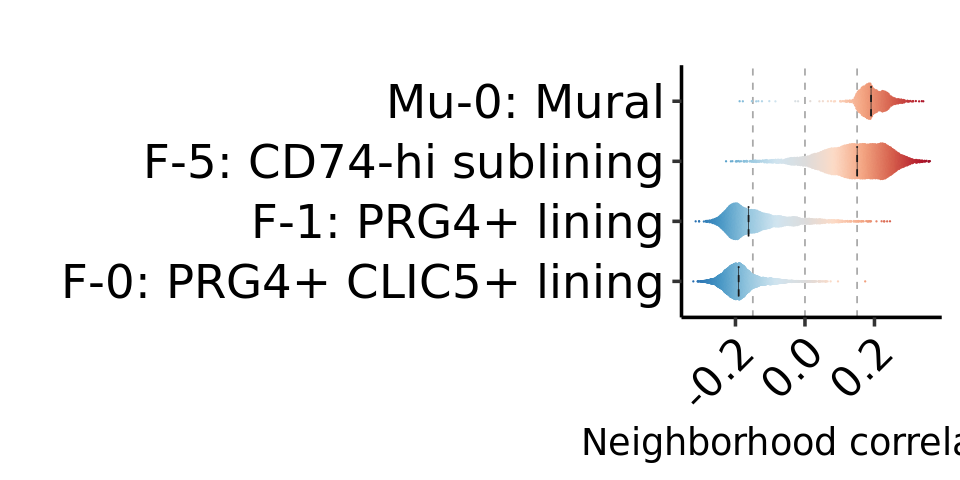

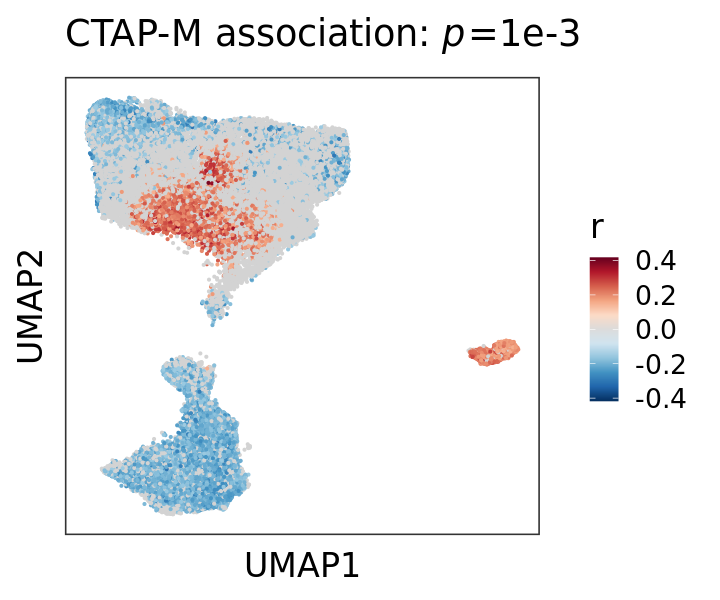

In [156]:
cna_res <- read_excel("fibro_M_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
colnames(cna_res)[which(colnames(cna_res) == "CellID")] <- "cell"
ref <- readRDS("../../data/amp_phase2_ra/fibroblast_reference_2021-09-10.rds")
cna_res <- merge(cna_res, ref$meta_data[, c("cell", "cluster_number", "cluster_name")], by ="cell")
temp <- cbind(ref$meta_data[, c("cell", "cluster_number", "cluster_name")], ref$umap$embedding)
cna_res <- merge(cna_res[, c("cell", "res_ncorrs")], temp, by ="cell")
dim(cna_res)


fdr_thresh <- 0.15
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("M", nrow(test))
test$cell_type <- "Stromal cell"
test$permutation_p <- 0.001



options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 25),
       axis.text.y = element_text(color = "black", size = 28))



interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "r") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=22), # face="bold.italic"
        ) +
#       labs(title = "CTAP-M association: p = 1e-3")
        ggtitle(expression(paste("CTAP-M association:", italic(" p"), "=1e-3")))
ggsave(file = paste("cna_fibroblast_M", ".png", sep = ""), width = 5, height = 4, dpi = 300)

New names:
• `` -> `...1`
• `...1` -> `...3`


[1] 61358     6

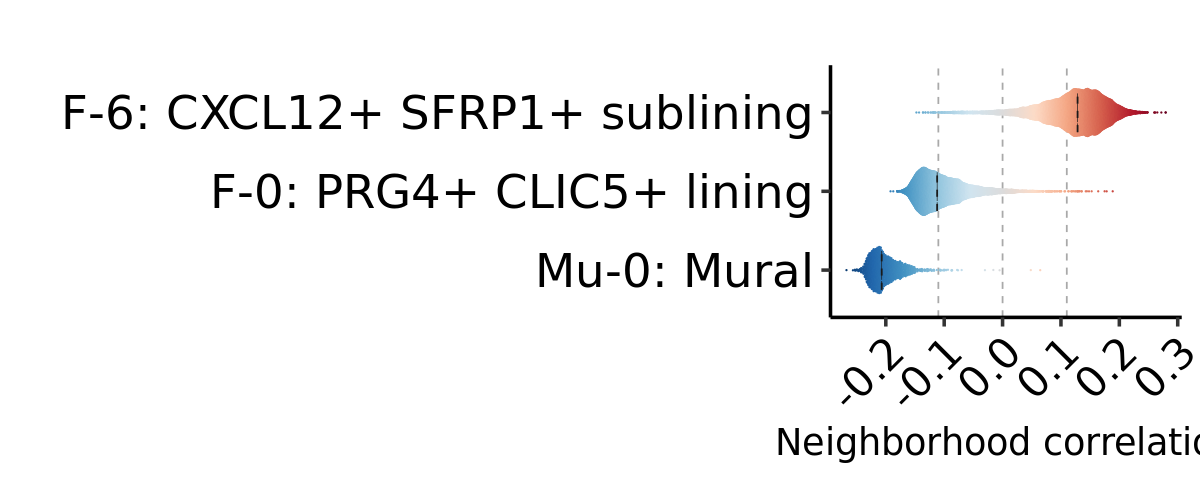

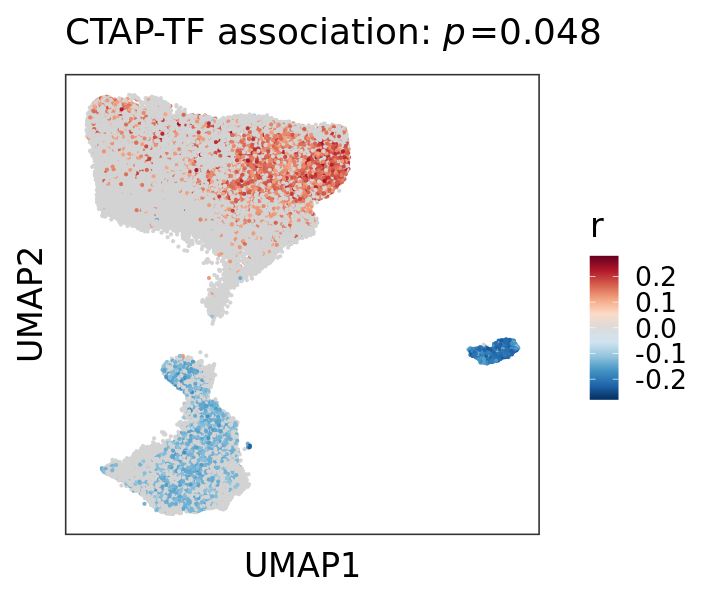

In [153]:
cna_res <- read_excel("fibro_TF_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
colnames(cna_res)[which(colnames(cna_res) == "CellID")] <- "cell"
ref <- readRDS("../../data/amp_phase2_ra/fibroblast_reference_2021-09-10.rds")
temp <- cbind(ref$meta_data[, c("cell", "cluster_number", "cluster_name")], ref$umap$embedding)
cna_res <- merge(cna_res[, c("cell", "res_ncorrs")], temp, by ="cell")
dim(cna_res)

fdr_thresh <- 0.11
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("TF", nrow(test))
test$cell_type <- "Stromal cell"
test$permutation_p <- 0.048



options(repr.plot.height = 4, repr.plot.width = 10)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 25),
       axis.text.y = element_text(color = "black", size = 28))



interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "r") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=21.5), # face="bold.italic"
        ) +
#       labs(title = "CTAP-TF association: p = 0.048")
        ggtitle(expression(paste("CTAP-TF association:", italic(" p"), "=0.048")))
ggsave(file = paste("cna_fibroblast_TF", ".png", sep = ""), width = 5, height = 4, dpi = 300)

New names:
• `` -> `...1`
• `...1` -> `...3`


[1] 61358     6

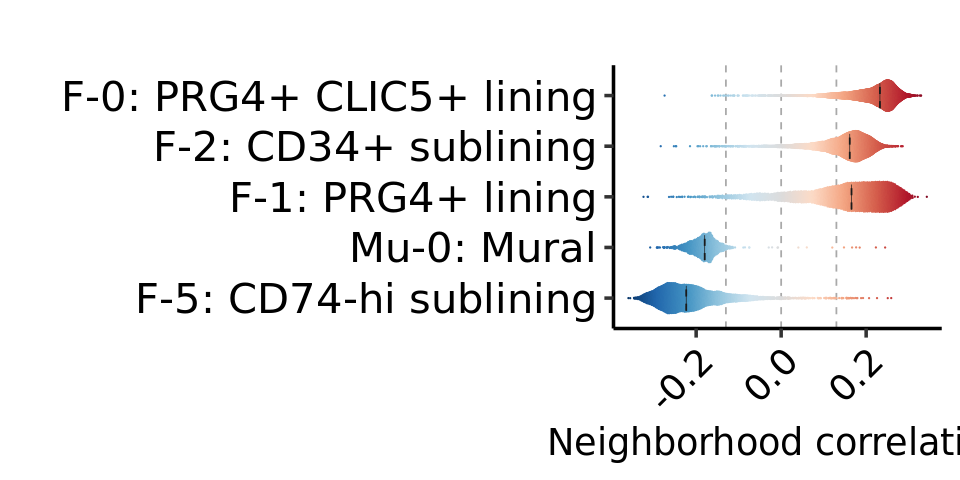

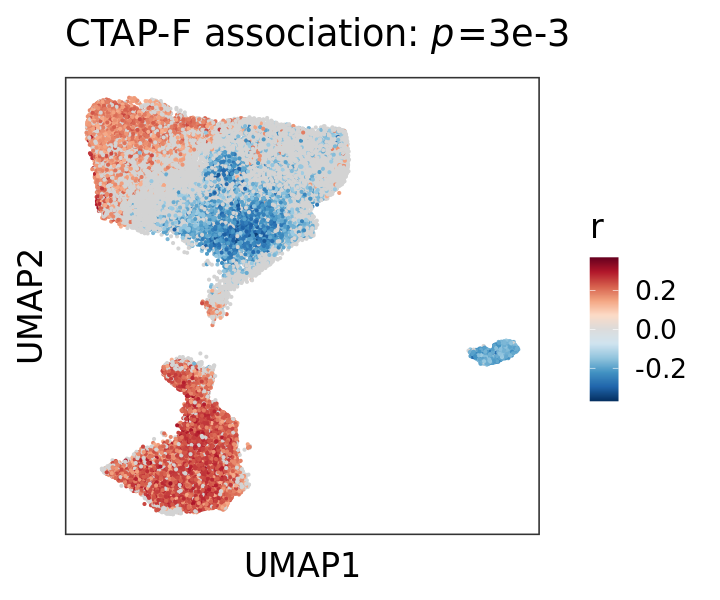

In [158]:
cna_res <- read_excel("fibro_F_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
colnames(cna_res)[which(colnames(cna_res) == "CellID")] <- "cell"
ref <- readRDS("../../data/amp_phase2_ra/fibroblast_reference_2021-09-10.rds")
temp <- cbind(ref$meta_data[, c("cell", "cluster_number", "cluster_name")], ref$umap$embedding)
cna_res <- merge(cna_res[, c("cell", "res_ncorrs")], temp, by ="cell")
dim(cna_res)


fdr_thresh <- 0.13
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("F", nrow(test))
test$cell_type <- "Stromal cell"
test$permutation_p <- 0.0027


options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))



interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "r") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=22), # face="bold.italic"
        ) +
        ggtitle(expression(paste("CTAP-F association:", italic(" p"), "=3e-3"))) # 0.0027
ggsave(file = paste("cna_fibroblast_F", ".png", sep = ""), width = 5, height = 4, dpi = 300)

# NK

New names:
• `` -> `...1`


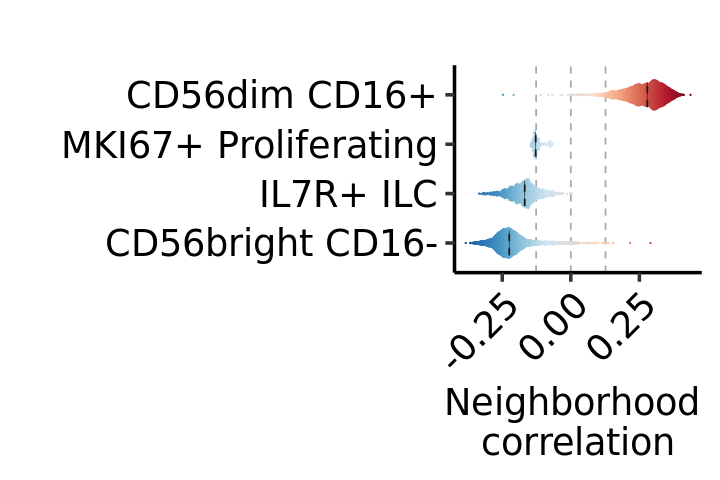

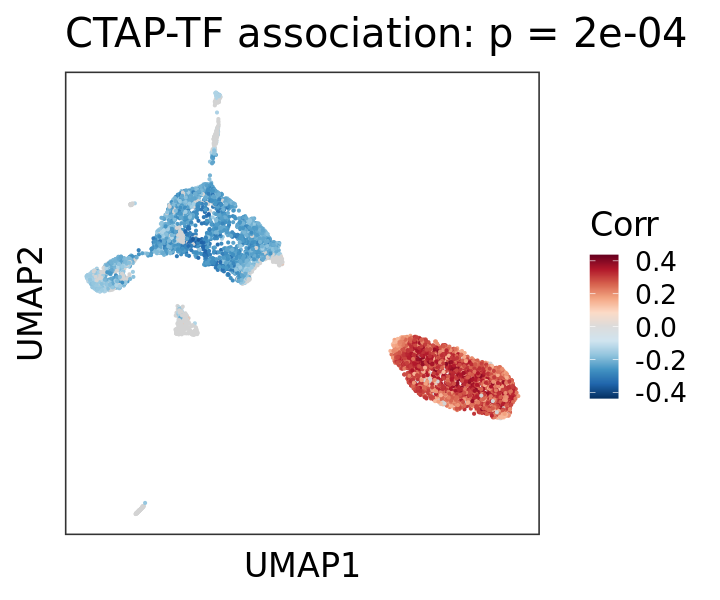

In [62]:
cna_res <- read_excel("nk_TF_res.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
cna_res$cluster_name_new <- cna_res$cluster_name
cna_res$cluster_name_new[which(cna_res$cluster_name_new %in% c('CD56bright CD16- GNLY+','CD56bright CD16- GNLY+CD69+','CD56bright CD16- GZMA+CD160+','CD56bright CD16- GZMA+CD69+','CD56bright CD16- IFN response'))] <- "CD56bright CD16-"
cna_res$cluster_name_new[which(cna_res$cluster_name_new %in% c('CD56dim CD16+ GZMB-','CD56dim CD16+ IFNG+CD160+','CD56dim CD16+ IFNG+CD160-','CD56dim CD16+ IFNG-'))] <- "CD56dim CD16+"

fdr_thresh <- 0.1265
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name_new) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("TF", nrow(test))
test$cell_type <- "NK"
test$permutation_p <- 2e-04


options(repr.plot.height = 4, repr.plot.width = 6)
ggplot(cna_res[which(cna_res$cluster_name_new %in% test[which(test$significance == TRUE),]$cluster_name_new),], 
       aes(x = reorder(cluster_name_new, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name_new), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood \ncorrelation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 22))



interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "CTAP-TF association: p = 2e-04")


# T aggregation

New names:
• `` -> `...1`


[1] 67383    22

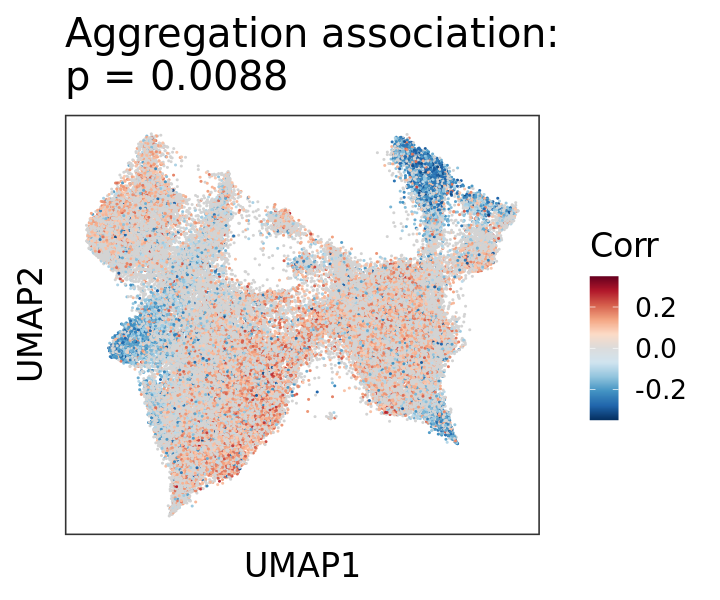

In [68]:
cna_res <- read_excel("tcell_aggr_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
ref <- readRDS("../../data/amp_phase2_ra/T_reference_2020-11-25.rds")
cna_res <- merge(cna_res, ref$meta_data[, c("cell", "cluster_number", "cluster_name")])
dim(cna_res)


fdr_thresh <- 0.09
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.2) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Aggregation association:\np = 0.0088")


New names:
• `` -> `...1`


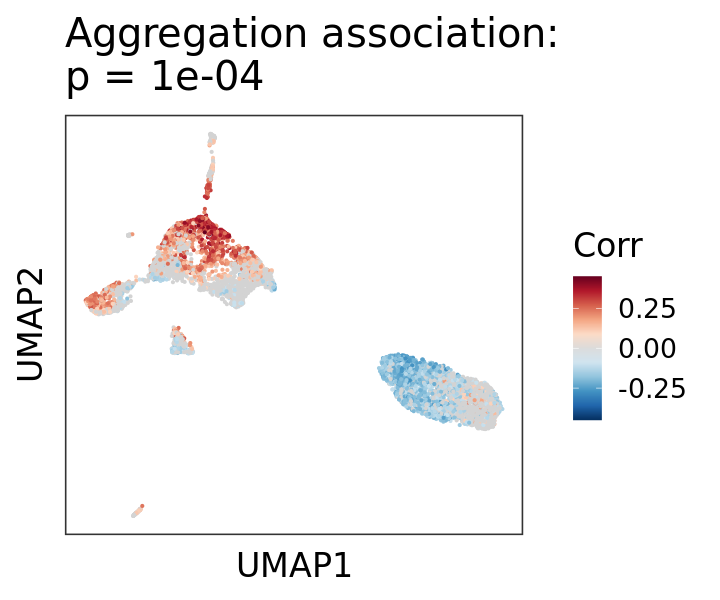

In [72]:
cna_res <- read_excel("nk_aggr_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
cna_res$cluster_name_new <- cna_res$cluster_name
cna_res$cluster_name_new[which(cna_res$cluster_name_new %in% c('CD56bright CD16- GNLY+','CD56bright CD16- GNLY+CD69+','CD56bright CD16- GZMA+CD160+','CD56bright CD16- GZMA+CD69+','CD56bright CD16- IFN response'))] <- "CD56bright CD16-"
cna_res$cluster_name_new[which(cna_res$cluster_name_new %in% c('CD56dim CD16+ GZMB-','CD56dim CD16+ IFNG+CD160+','CD56dim CD16+ IFNG+CD160-','CD56dim CD16+ IFNG-'))] <- "CD56dim CD16+"

fdr_thresh <- 0.1
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name_new) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("Aggregation", nrow(test))
test$cell_type <- "NK"
test$permutation_p <-0.0004


interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Aggregation association:\np = 1e-04")


New names:
• `` -> `...1`


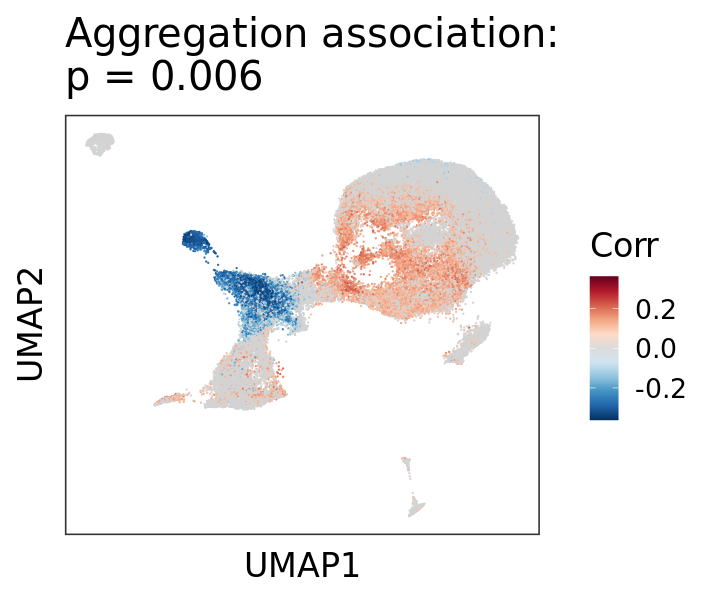

In [74]:
cna_res <- read_excel("myeloid_agg_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]


fdr_thresh <- 0.1
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Aggregation association:\np = 0.006")


New names:
• `` -> `...1`


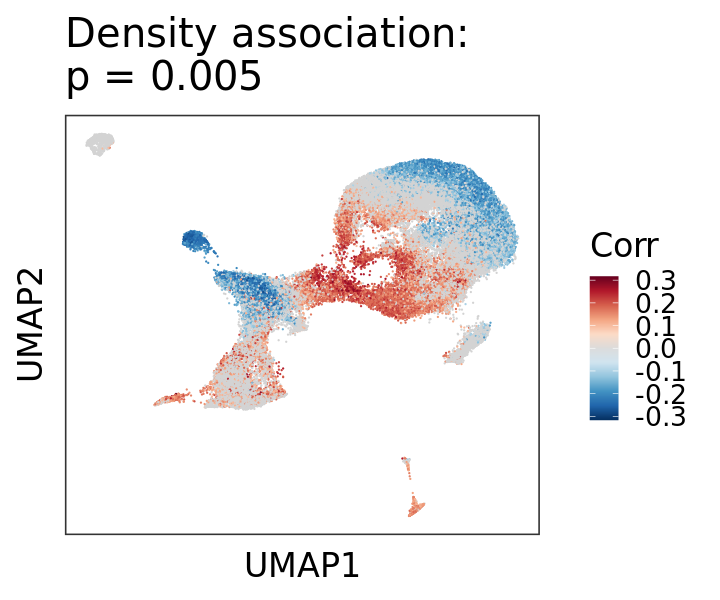

In [76]:
cna_res <- read_excel("myeloid_density_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]


fdr_thresh <- 0.1
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Density association:\np = 0.005")


New names:
• `` -> `...1`


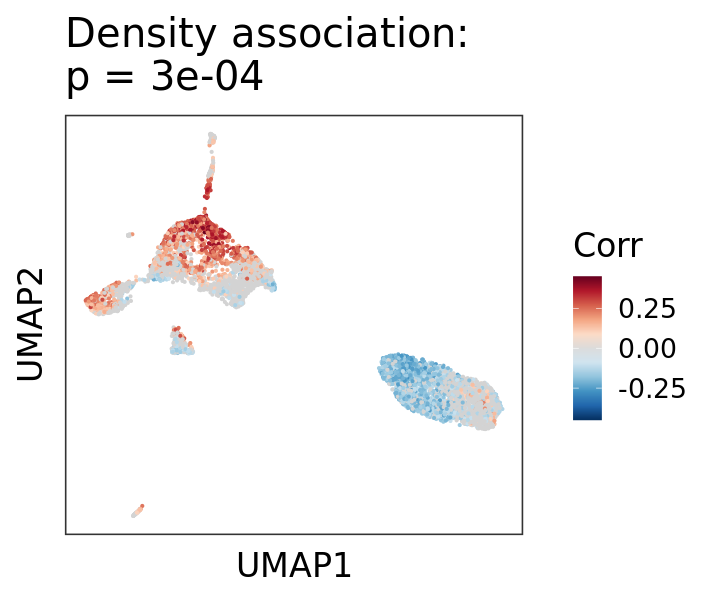

In [78]:
cna_res <- read_excel("nk_density_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
cna_res$cluster_name_new <- cna_res$cluster_name
cna_res$cluster_name_new[which(cna_res$cluster_name_new %in% c('CD56bright CD16- GNLY+','CD56bright CD16- GNLY+CD69+','CD56bright CD16- GZMA+CD160+','CD56bright CD16- GZMA+CD69+','CD56bright CD16- IFN response'))] <- "CD56bright CD16-"
cna_res$cluster_name_new[which(cna_res$cluster_name_new %in% c('CD56dim CD16+ GZMB-','CD56dim CD16+ IFNG+CD160+','CD56dim CD16+ IFNG+CD160-','CD56dim CD16+ IFNG-'))] <- "CD56dim CD16+"

fdr_thresh <- 0.1
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.5) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.position = "none",
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Density association:\np = 3e-04")

New names:
• `` -> `...1`


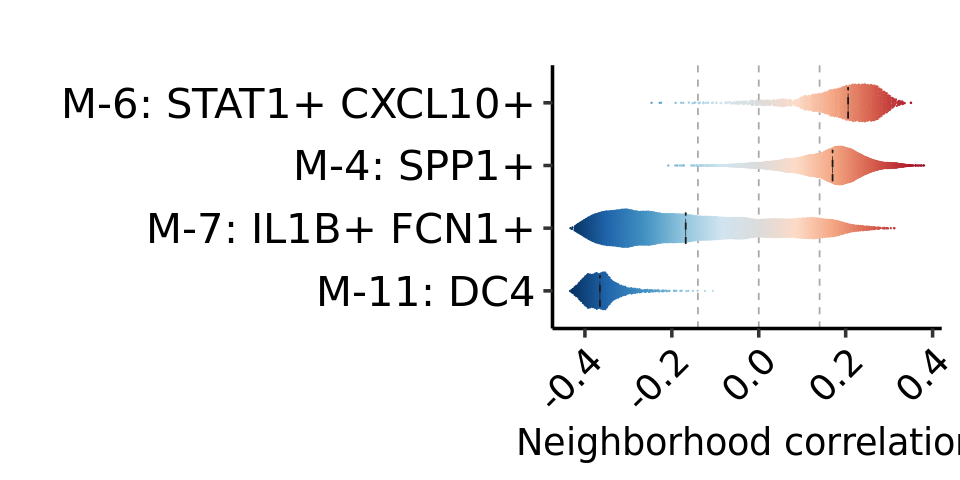

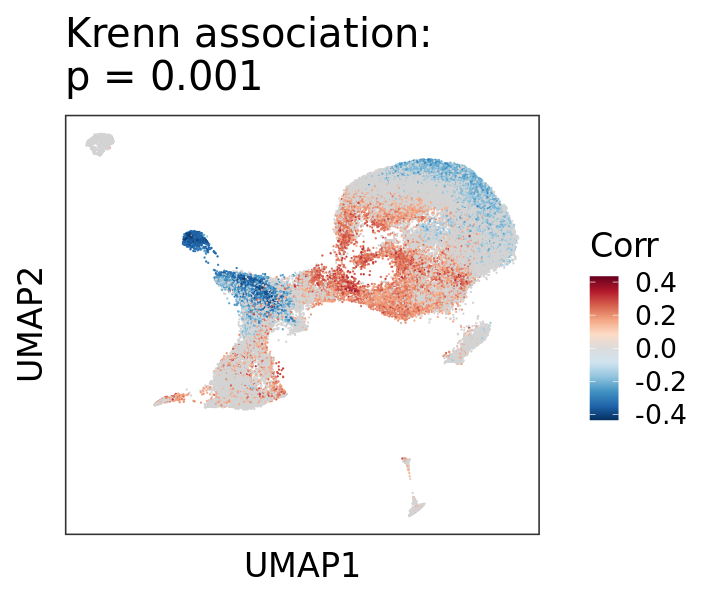

In [30]:
cna_res <- read_excel("myeloid_krenn_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]

fdr_thresh <- 0.14
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("Krenn", nrow(test))
test$cell_type <- "Myeloid"
test$permutation_p <- 0.001


options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))


interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Krenn association:\np = 0.001")


New names:
• `` -> `...1`


[1] 67383    22

cell                     id      donor age sex pathotype_overall
1 BRI-401_AAACCCAGTACTTCCC BRI-401 1     77  1   2                
2 BRI-401_AAACGAACACACGGTC BRI-401 1     77  1   2                
3 BRI-401_AAACGCTCAATACCCA BRI-401 1     77  1   2                
4 BRI-401_AAAGGATCACACACGC BRI-401 1     77  1   2                
  density_overall aggr_overall krenn_inflam_overall UMAP1     ⋯ F     M   
1 2               0            2                    -4.238278 ⋯ FALSE TRUE
2 2               0            2                    -1.686032 ⋯ FALSE TRUE
3 2               0            2                    -1.593913 ⋯ FALSE TRUE
4 2               0            2                    -1.442266 ⋯ FALSE TRUE
  T_B   T_F   T_M   number_cells res_ncorrs   res_kept cluster_number
1 FALSE FALSE FALSE 502          -0.030680166 TRUE     T-4           
2 FALSE FALSE FALSE 502          -0.119676187 TRUE     T-6           
3 FALSE FALSE FALSE 502           0.048074310 TRUE     T-8           
4 FALSE FALSE FALSE 502           0.007665181 TRUE     T-8           
  cluster_name       
1 CD4+ naive         
2 CD4+ memory        
3 CD4+ CD25-high Treg
4 CD4+ CD25-high Treg

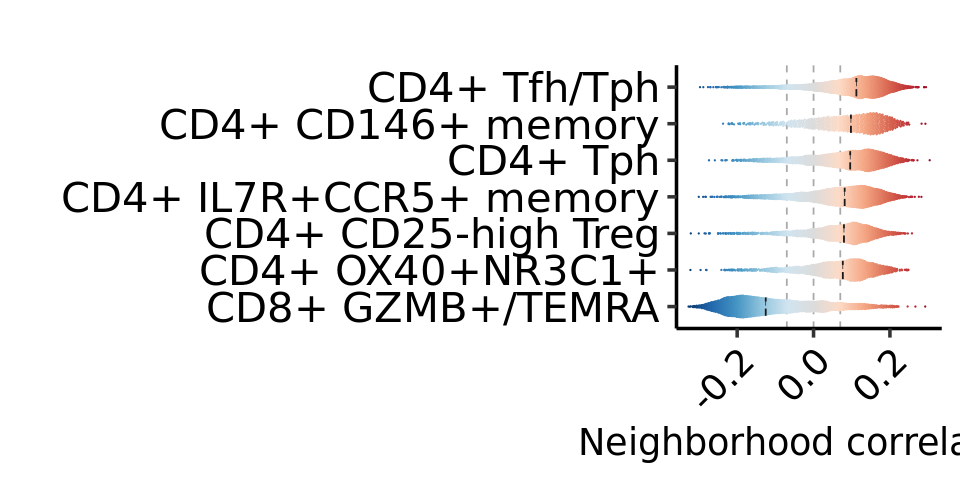

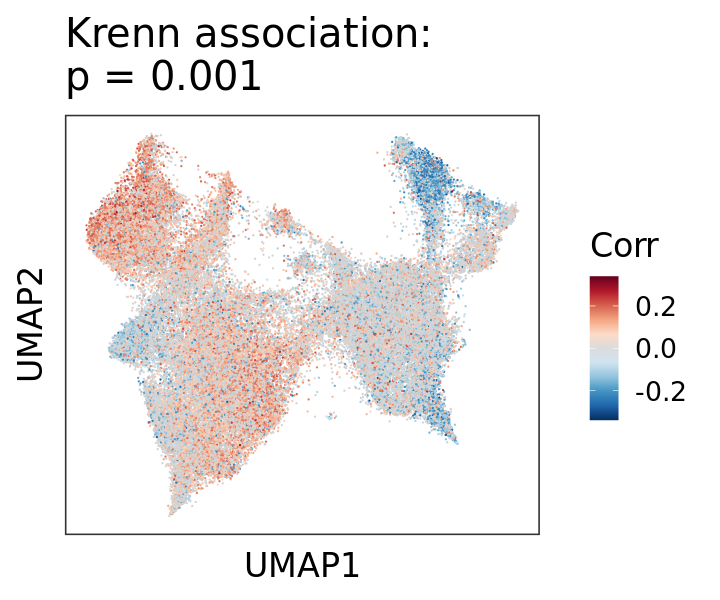

In [33]:
cna_res <- read_excel("tcell_krenn_res_varscaRescale_pseudoc_cellnum_2021-10-20.xlsx")
cna_res <- cna_res[, -1]
cna_res <- cna_res[which(cna_res$res_kept == "TRUE"),]
ref <- readRDS("../../data/amp_phase2_ra/T_reference_2020-11-25.rds")
cna_res <- merge(cna_res, ref$meta_data[, c("cell", "cluster_number", "cluster_name")])
dim(cna_res)
cna_res[1:4,]


fdr_thresh <- 0.07
interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))

# Selected most significant clusters to plot
test <- cna_res %>%
    group_by(cluster_name) %>%
    dplyr::summarize(Mean = mean(res_ncorrs, na.rm=TRUE),
                     Median = median(res_ncorrs, na.rm=TRUE),
                     n_cell = n(),
                     perc_pos = 100 * sum(res_ncorrs > fdr_thresh)/n_cell,
                     perc_neg = 100 * sum(res_ncorrs < -fdr_thresh)/n_cell,
                     perc_nonSig = 100 * sum(res_ncorrs > -fdr_thresh & res_ncorrs < fdr_thresh)/n_cell 
                    )
test$significance <- abs(test$Median) > fdr_thresh
test$category <- rep("Krenn", nrow(test))
test$cell_type <- "T cell"
test$permutation_p <- 0.02


options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(cna_res[which(cna_res$cluster_name %in% test[which(test$significance == TRUE),]$cluster_name),], 
       aes(x = reorder(cluster_name, res_ncorrs), y = res_ncorrs)) +
  coord_flip() +
#   scale_x_discrete(name = "", position = "top") + 
  geom_hline(yintercept = fdr_thresh, linetype = "dashed", color = "darkgrey") + 
  geom_hline(yintercept = -fdr_thresh, linetype = "dashed", color = "darkgrey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgrey") +
  geom_quasirandom(aes(color=res_ncorrs), width = 0.3, size = 0.001) +
  stat_summary(aes(group = cluster_name), fun = median, fun.min = median, fun.max = median, geom = "crossbar", color = "grey10", width = 0.5, lwd = 0.2, linetype = 2) +
  scale_colour_gradientn(colours = myPalette(100), limits = c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))) + 
#   scale_color_distiller(na.value="#DCDCDC", palette = "RdBu")+
  labs(title = "", x= "", y = "Neighborhood correlation") +
  theme_classic(base_size = 22) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
  ) +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black", size = 22),
       axis.text.y = element_text(color = "black", size = 25))


interval <- c(-max(abs(cna_res$res_ncorrs)), max(abs(cna_res$res_ncorrs)))
myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
cna_res$res_ncorrs[which(abs(cna_res$res_ncorrs) < fdr_thresh)] <- NA

options(repr.plot.height = 5, repr.plot.width = 6)
ggplot(
      data = cna_res[sample(nrow(cna_res)),], 
      aes(x = UMAP1, y = UMAP2)) + 
      geom_point(mapping = aes(color = res_ncorrs), size = 0.001) + 
      scale_colour_gradientn(na.value="lightgray",colors = myPalette(100), limits = interval, name = "Corr") + 
      labs(x="UMAP1", y="UMAP2") +
      theme_bw(base_size = 20)+
      theme(
#         legend.positigeom_point_rast,
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=24), # face="bold.italic"
        ) +
      labs(title = "Krenn association:\np = 0.001")


[1] 79555     5


     F-0: PRG4+ CLIC5+ lining             F-1: PRG4+ lining 
                        21076                          4786 
         F-2: CD34+ sublining         F-3: POSTN+ sublining 
                         9958                          9780 
         F-4: DKK3+ sublining        F-5: CD74-hi sublining 
                         4937                          5245 
F-6: CXCL12+ SFRP1+ sublining        F-7: NOTCH3+ sublining 
                        15854                          4499 
     F-8: RSPO3+ intermediate                   Mu-0: Mural 
                         1684                          1736 


    0     1     2     3     4     5     6     7     8     9 
21076  4786  9958  9780  4937  5245 15854  4499  1684  1736 

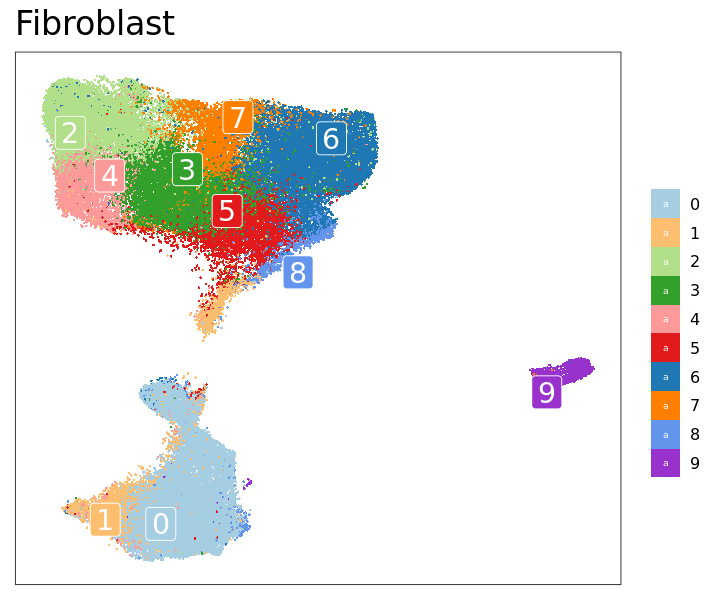

In [74]:
ref <- readRDS("../../data/amp_phase2_ra/fibroblast_reference_2021-09-10.rds")
meta_all <- cbind(ref$meta_data[, c("cell", "cluster_number", "cluster_name")], ref$umap$embedding)
dim(meta_all)
table(meta_all$cluster_name)
table(meta_all$cluster_number)

meta_all$cluster_number <- factor(meta_all$cluster_number,  levels = seq(0, 9))
cluster_center <- meta_all %>%
                  group_by(cluster_number) %>%
                  summarise_at(vars(UMAP1, UMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)
cluster_center$cluster_number <- as.character(cluster_center$cluster_number)


options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = UMAP1, y = UMAP2, fill= cluster_number)
      ) +
  geom_point(size = 0.7, stroke = 0.0001, shape = 21) +
  geom_label_repel(
    data = cluster_center,
    aes(label = cluster_number, fill = cluster_number),
#     fontface = 'bold', 
    size = 6, 
    color = 'white',
    box.padding = unit(0.2, "lines"),
    point.padding = unit(0.2, "lines"),
    segment.color = 'grey50'
  ) +
  scale_fill_manual(values = c('#A6CEE3', '#FDBF6F','#B2DF8A','#33A02C','#FB9A99','#E31A1C', '#1F78B4', '#FF7F00','#6495ED','#9932CC'), name = "") + 
  guides( fill = guide_legend(override.aes = list(shpae = 15, size = 2))) +
  labs(
      x = NULL,
      y = NULL,
      title = "Fibroblast"
      ) +
  theme_bw(base_size = 12) +
  theme(
#     legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=20)
    )
options(repr.plot.height = 4, repr.plot.width = 4)
# ggsave(file = paste("endothelial_umap_cluster", ".png", sep = ""), width = 4, height = 4, dpi = 300)